# Restaurant Revenue Prediction

This notebook has the objective to try this kaggle competion, to predict restaurant revenue:
    
https://www.kaggle.com/c/restaurant-revenue-prediction/data

In [96]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#Reading the csv dataset for training
train = pd.read_csv('train.csv')
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [97]:
#Checking the info about the features.
#There are 1 id column, 1 date column, 1 text, and 2 categorical features.
#all the other features are numerical
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [99]:
#Checking the values count of categorical feature City Group
pd.DataFrame(train["City Group"].value_counts())

,City Group
Big Cities,78
Other,59


In [100]:
#Checking the values count of categorical feature Type of Restaurant
pd.DataFrame(train["Type"].value_counts())

,Type
FC,76
IL,60
DT,1


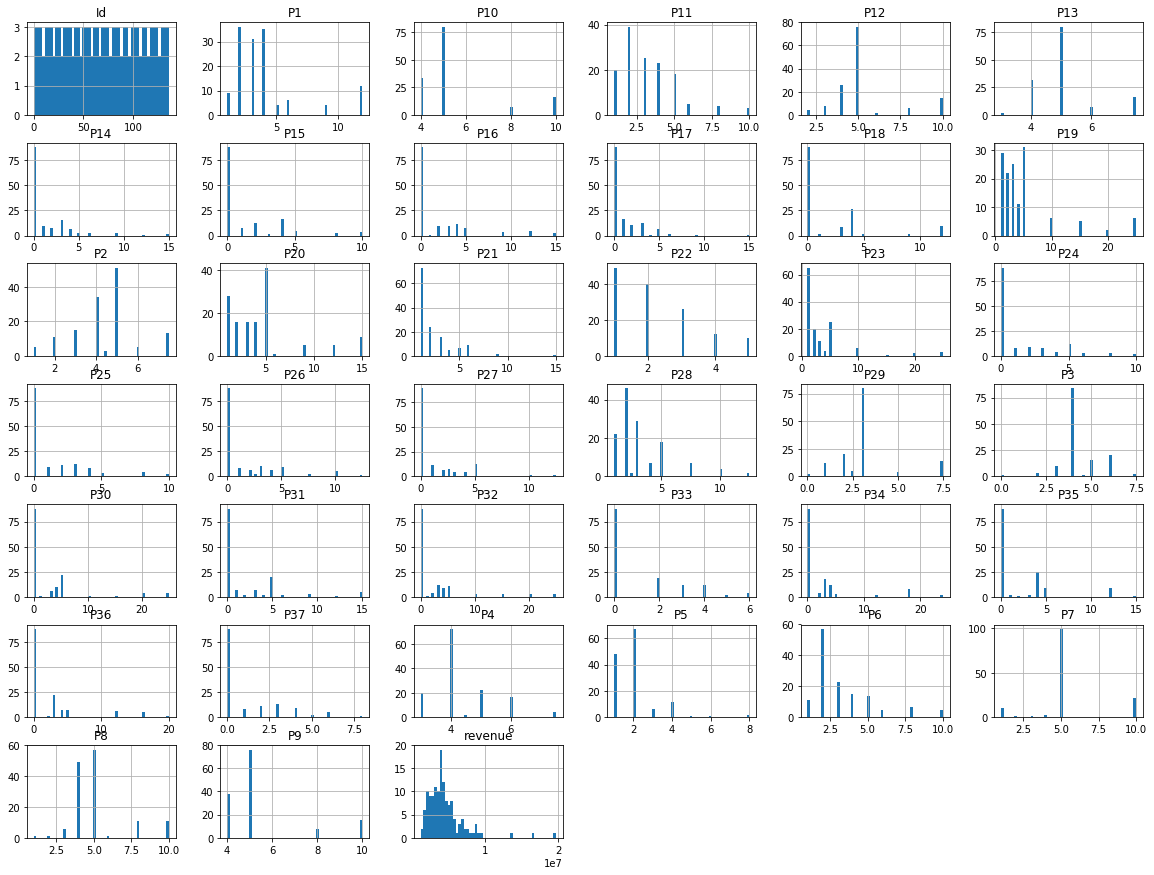

In [12]:
%matplotlib inline
train.hist(bins=50, figsize=(20,15))
plt.show()

In [102]:
#Removing the id column, so we can see the correlation matrix correctly
train_without_id = train.drop("Id",axis=1)
corr_matrix = train_without_id.corr()
corr_matrix

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
P1,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,0.795885,...,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217
P2,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,0.498135,...,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518
P3,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,0.764191,...,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613
P4,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,0.685416,...,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685
P5,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,0.462299,...,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191
P6,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,0.654594,...,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.139094
P7,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,0.775642,...,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.051165
P8,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,0.881650,...,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215
P9,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,0.961266,...,0.789784,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352
P10,0.795885,0.498135,0.764191,0.685416,0.462299,0.654594,0.775642,0.881650,0.961266,1.000000,...,0.789510,0.514738,0.462235,0.549238,0.320317,0.601956,0.483010,0.565068,0.313748,-0.073220


In [104]:
corr_revenue = pd.DataFrame(corr_matrix["revenue"].sort_values(ascending=False))
corr_revenue

,revenue
revenue,1.000000
P2,0.191518
P28,0.155534
P6,0.139094
P21,0.097411
P11,0.084247
P22,0.083562
P1,0.070217
P17,0.067137
P7,0.051165


In [106]:
best_corr_revenue = corr_revenue[(corr_revenue["revenue"]>0.05) | (corr_revenue["revenue"]< -0.06)]

pd.DataFrame(best_corr_revenue)
best_features = best_corr_revenue.index.values
best_features

array(['revenue', 'P2', 'P28', 'P6', 'P21', 'P11', 'P22', 'P1', 'P17',
       'P7', 'P12', 'P32', 'P30', 'P34', 'P10', 'P8', 'P13', 'P29'],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F88B4745F8>,
      dtype=object)

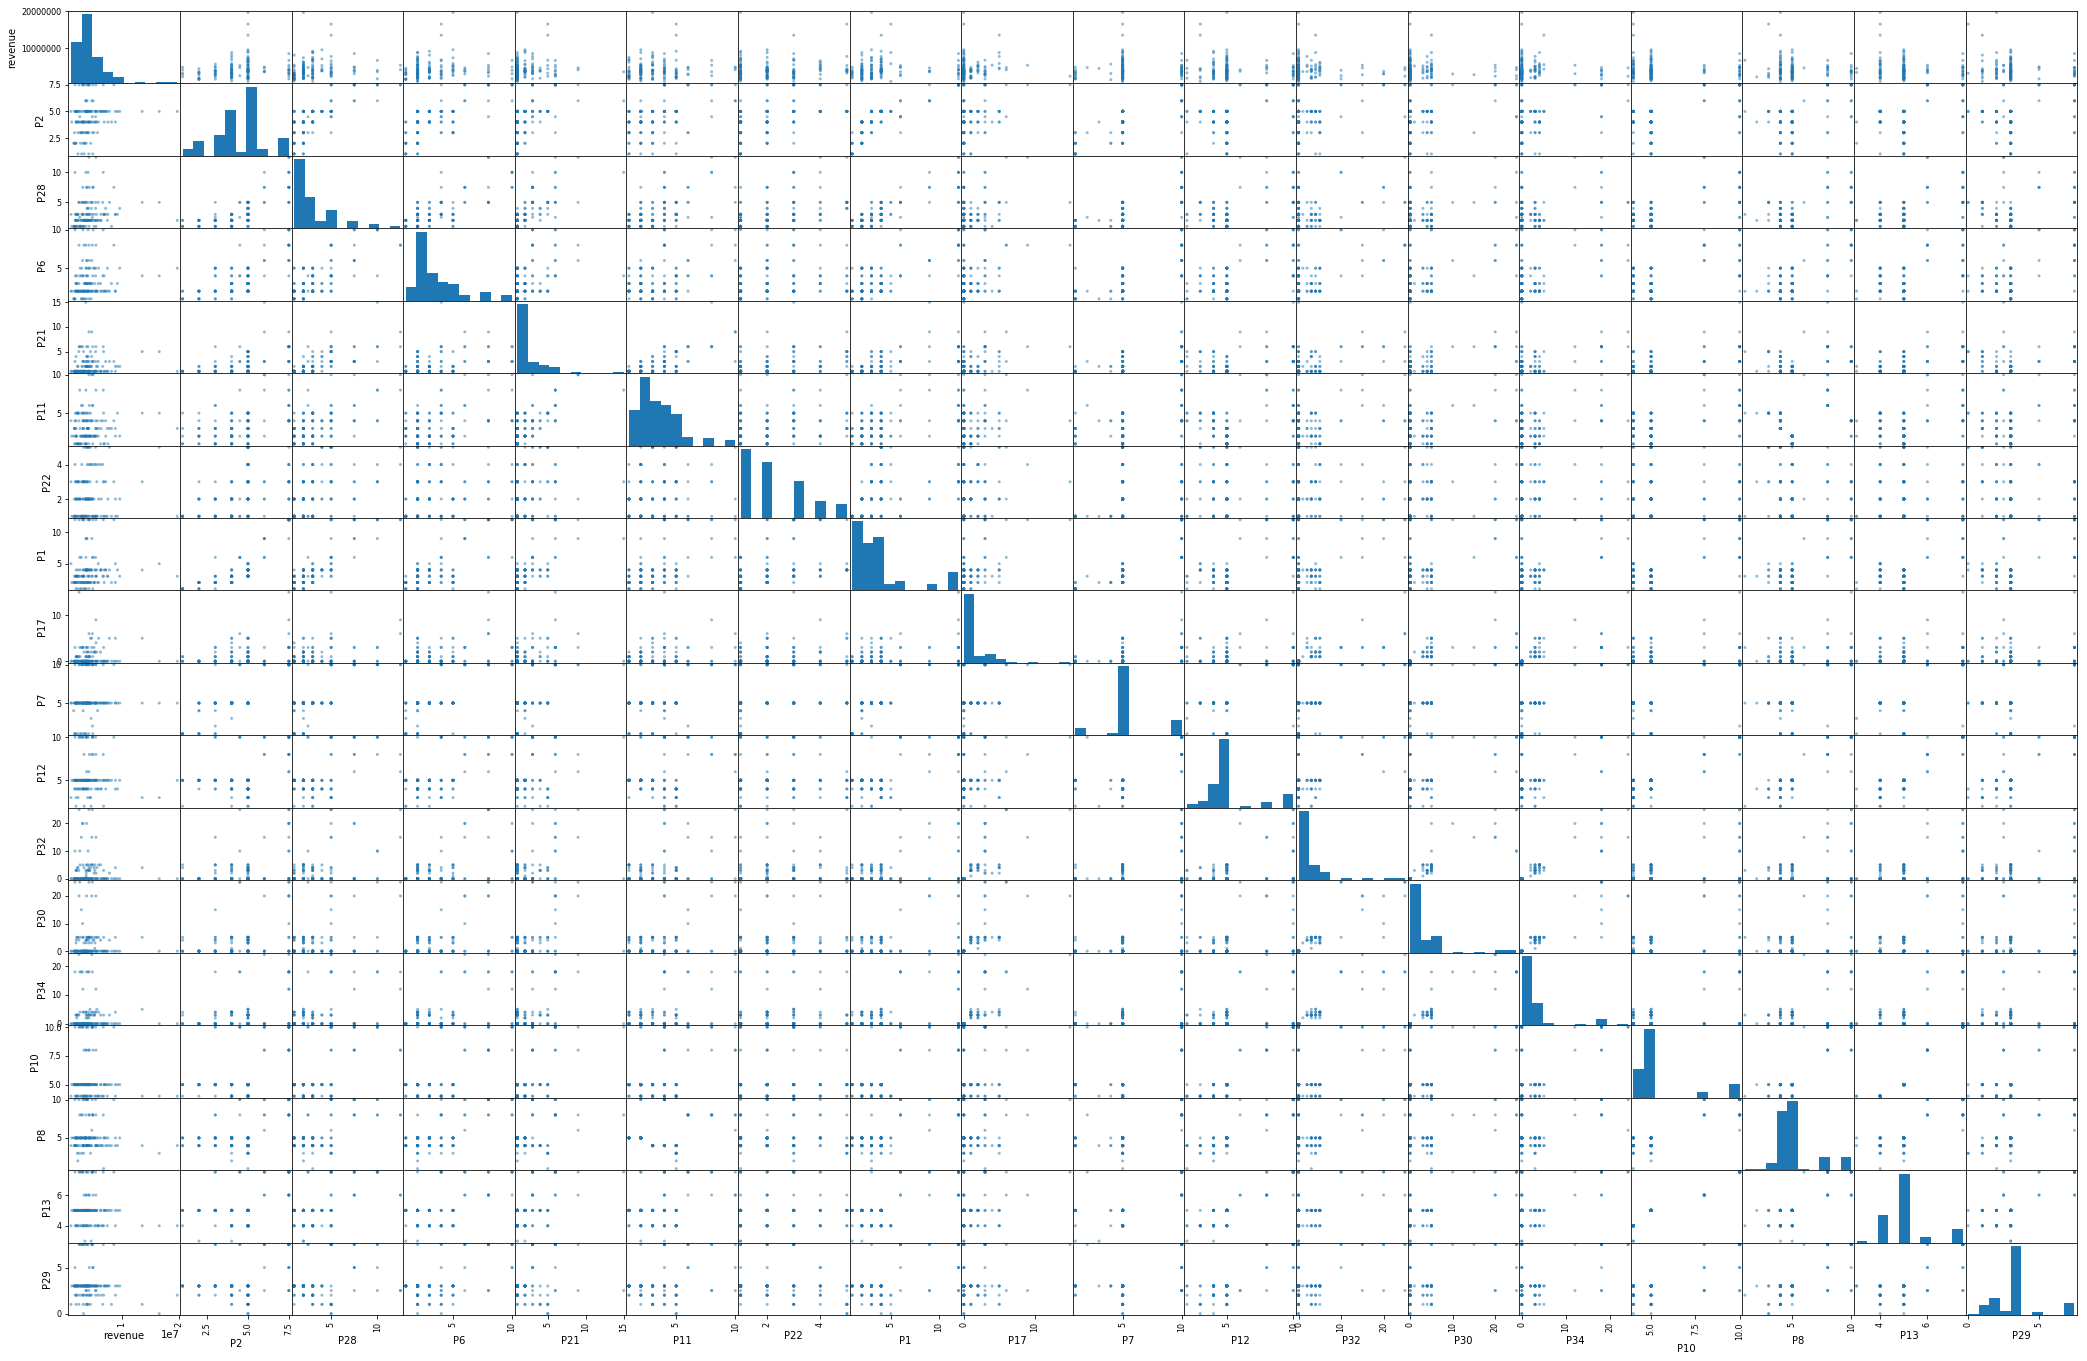

In [95]:
from pandas.plotting import scatter_matrix
from scipy import stats

scatter_matrix(train[best_features], figsize=(36,24))